# Neural Network from sklearn
Conny Lin | June 15, 2020 | updated June 20, 2020

[sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


## start up script

### local computer

In [ ]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import other standard paths and local variables
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
from brainstation_capstone.ml.toolbox.mlSOP import test_model
from brainstation_capstone.ml.toolbox.mlSOP import ml_timer
from brainstation_capstone.vs.plots import hyperparameterplot
# import standard libraries
import time, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# import local libraries using host specific paths
# report latest run
print(f'last ran on: {datetime.datetime.now()} PT')
# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

getting host computer specific paths
last ran on: 2020-06-20 14:37:21.296533 PT
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3loading completed


### google colab


In [3]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# import functions and data
print('import functions')
import pandas as pd
import numpy as np
import os, time, datetime
import matplotlib.pyplot as plt

class test_model:
    def __init__(self):
        # set test and train score
        self.test_acc = []
        self.train_acc = []
    def score_data(self, model, datadict):
        self.model = model
        self.data = datadict
        # fit model
        self.model.fit(self.data['X_train'], self.data['y_train'])
        # train score
        train_score = self.model.score(self.data['X_train'], self.data['y_train'])
        print(f"\tTrain Score: {train_score}")
        self.train_acc.append(train_score)
        # test score
        test_score = self.model.score(self.data['X_test'], self.data['y_test'])
        print(f"\tTest Score: {test_score}")
        self.test_acc.append(test_score)

class ml_timer:
    def __init__(self):
        # initate session start time
        self.start = time.time()
        # initiate holder for times
        self.session_times = []
        print('timer starts')

    def param_start(self):
        # update current session start time
        self.current_session_start = time.time()

    def param_end(self):
        end_time = time.time()
        elapsed_time = end_time - self.current_session_start
        print(f'\telapsed time {elapsed_time/60:.3f} min')
        self.session_times.append(elapsed_time)
    
    def session_end(self):
        self.end = time.time()
    
    def get_time(self):
        print(f'total time: {(self.end - self.start)/60:.3f} min')
        return self.session_times

def hyperparameterplot(hyperparameter_list, train_score_list, test_score_list, \
                        hyperparameter_name='', titlename=''):
    
    # check if hyperparameter list is string or number
    if isinstance(hyperparameter_list[0], str):
        hyperparameter_label = hyperparameter_list.copy()
        hyperparameter_list = range(len(hyperparameter_list))
    # graph
    plt.figure()
    plt.plot(hyperparameter_list, train_score_list, color='blue', label='train')
    plt.plot(hyperparameter_list, test_score_list, color='red', label='test')
    plt.title(titlename)
    plt.xlabel(hyperparameter_name)
    if isinstance(hyperparameter_list[0], str):
        plt.xticks(labels=hyperparameter_label)
    plt.ylabel('accuracy score')
    plt.legend()
    plt.show()
  
# define file directory
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'
# get files from google drive
print('loading data to data dictionary')
datatype = ['X_train','X_test','y_train','y_test']
dataname = 'nutcracker'
data = dict()
for i, dname in enumerate(datatype):
    print(f'loading file: {i}', end='\r')
    filename = dataname + '_' + dname + '.csv'
    filepath = os.path.join(file_dir, filename)
    data[dname] = np.loadtxt(filepath, delimiter=',')
print('loading completed')
# print the array shape to confirm successful loading
print(data['X_train'].shape)
# report time run
print(f'last ran on: {datetime.datetime.now()} PT')

import functions
loading data to data dictionary
loading completed
(1600000, 21)
last ran on: 2020-06-21 17:19:09.017581 PT


## run untune model


Try a simple NN from sklearn. But usually won't use this package. Normally use packages like *Keras*, *TensorFlow*, *PyTorch*, etc., which are all specifically designed for neural networks.

In [ ]:
def PlotBoundaries(model, X, Y) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y,s=20, edgecolor='k')
    plt.show()

## Try simple NN from sklearn

In [ ]:
# try simple NN
from sklearn.neural_network import MLPClassifier
# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X, X_test, y, y_test = Nutcracker(datapath).mldata(feature_reduction='None')

None
None


In [ ]:
NN_model = MLPClassifier(hidden_layer_sizes=(1),solver='lbfgs')
NN_model.fit(X_train, y_train);

In [ ]:
print(f"Train Score: {NN_model.score(X_train,y_train): 0.3f}")
print(f"Test Score: {NN_model.score(X_test,y_test): 0.3f}")

Train Score:  0.869
Test Score:  0.869


solver lbfgs and layer size =1 gives similar results as other ML models.

In [ ]:
import timeit
from sklearn.neural_network import MLPClassifier
# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X, X_test, y, y_test = Nutcracker(datapath).mldata(feature_reduction='None')
# set up time
start_time = timeit.timeit()
print('timer start')
print(f'test timer {(timeit.timeit() - start_time)/60:.2f} min')
# start model
NN_model = MLPClassifier()
NN_model.fit(X, y)
# print results
print(f"Train Score: {NN_model.score(X, y): 0.3f}")
print(f"Test Score: {NN_model.score(X_test, y_test): 0.3f}")
# print time elapsed
print(f'took {(timeit.timeit() - start_time)/60:.2f} min')

counter start
test timer 0.00 min
Train Score:  0.913
Test Score:  0.913
took -0.00 min


untuned model gives 91% results. highest of all ML models

find out what hyperparamters the untuned model used.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

* hidden_layer_sizes: 100
* activation: relu
    * {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
    * try different activation
* solver: ’adam’
* alpha: 0.0001
    * higher more regularlized. (less over fit)
    * test and train score are similar. doesn't seem like too much overfit.
* batch_size: ’auto’
* learning_rate: constant
* learning_rate_init: 0.001
* power_t: 0.5
* max_iter: 200
* shuffle: True
* random_state: None
* tol: 1e-4
* verbose: False
* warm_start: False
* momentum: 0.9
* nesterov_momentum: True
* early_stopping: False
* validation_fraction: 0.1
* beta_1: 0.9
* beta_2: 0.999
* epsilon: 1e-8
* n_iter_no_change: 10
* max_fun: 15000

## Try different activation method | June 19, 09:43

In [ ]:
# BUG: this code has bug on timeit and test scores not being stored
import timeit
from sklearn.neural_network import MLPClassifier
# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X, X_test, y, y_test = Nutcracker(datapath).mldata(feature_reduction='None')
# set up time
start_time_all = timeit.timeit()
print('timer start')
print(f'test timer {(timeit.timeit() - start_time_all)/60:.2f} min')
# hyperparameters
activation_choice = ['identity', 'logistic', 'tanh', 'relu']
# declare output var
test_scores = []
train_scores = []
# test hyperparameter
for activation in activation_choice:
    print(f'running {activation}')
    # set up time
    start_time = timeit.timeit()
    # start model
    NN_model = MLPClassifier(activation=activation)
    NN_model.fit(X, y)
    # get scores
    train_score = NN_model.score(X, y)
    test_score = NN_model.score(X_test, y_test)
    # print results
    print(f"\tTrain Score: {train_score}")
    print(f"\tTest Score: {test_score}")
    # print time elapsed
    print(f'\ttook {(timeit.timeit() - start_time)/60:.2f} min')

# set up time
start_time_all = timeit.timeit()
print(f'total time: {(timeit.timeit() - start_time_all)/60:.2f} min')
                        

None
None
timer start
test timer -0.00 min
running identity
	Train Score: 0.869185
	Test Score: 0.868695
	took 0.00 min
running logistic
	Train Score: 0.917125625
	Test Score: 0.91604
	took -0.00 min
running tanh
	Train Score: 0.91812375
	Test Score: 0.91745
	took 0.00 min
running relu
	Train Score: 0.91652875
	Test Score: 0.915915
	took -0.00 min
total time: 0.00 min


In [ ]:
range(len(activation_choice))

range(0, 4)

In [ ]:
train_scores = [0.869185, 0.917125625, 0.91812375, 0.91652875]
test_scores = [0.868695, 0.91604, 0.91745, 0.915915]
activation_choice = ['identity', 'logistic', 'tanh', 'relu']


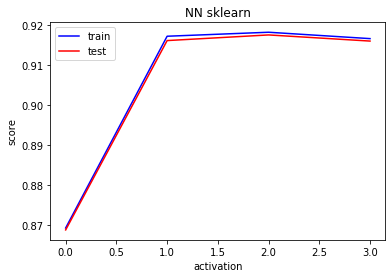

In [ ]:
# graph results
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(range(len(activation_choice)), train_scores, test_scores, 'activation', 'NN sklearn')

Activation method: identity is bad. logistic, tanh and relu are similar.

## test hidden layer size

In [ ]:
import time
from sklearn.neural_network import MLPClassifier

# hyperparameters - testing
hiden_layer_sizes_list = [50, 100, 200, 300] 
# hyperparameters - determined
activation = 'relu' # logistic, tanh are equally good. do not use identify

# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

# declare output var
test_acc = []
train_acc = []
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()

from brainstation_capstone.ml.mlSOP import test_train_score_capture
# test hyperparameter
for parameter in hiden_layer_sizes_list:
    print(f'running {parameter}')
    # set up time
    timer.param_start()
    # start model
    model = MLPClassifier(activation=activation, hidden_layer_sizes=parameter)
    train_acc, test_acc = test_train_score_capture(model, data, train_acc, test_acc)
    test_acc = []
    train_acc = []
    timer.param_end()

# set up time
timer.session_end()
time_per_session = timer.get_time()

# get scores
print(train_acc)
print(test_acc)

loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3loading completed
timer starts
running 50
	Train Score: 0.912915625
	Test Score: 0.912815
	elapsed time 19.535min
running 100
	Train Score: 0.91660375
	Test Score: 0.9157825
	elapsed time 14.841min
running 200
	Train Score: 0.919261875
	Test Score: 0.9177675
	elapsed time 25.705min
running 300
	Train Score: 0.918421875
	Test Score: 0.9164925
	elapsed time 30.006min
total time: 90.087 min
[]
[]


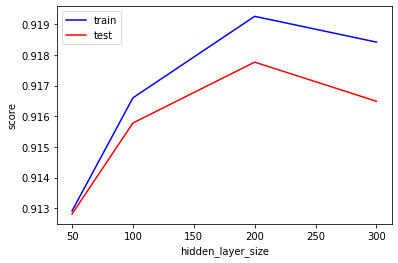

In [ ]:
# plot
hyperparameter_list = [50, 100, 200, 300] 
train_score_list = [0.912915625, 0.91660375, 0.919261875, 0.918421875]
test_score_list = [0.912815, 0.9157825, 0.9177675, 0.9164925]
hyperparameter_name = 'hidden_layer_size'
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, train_score_list, test_score_list, hyperparameter_name)


Seems the gain from over 100 hidden layers isn't too much (at the scale of 0.01-0.06%), but takes a longer to train (20min vs 30min) as well as increased overfitting. Lets stick with below 50.

## test solver

loading 4 files
loading completed
timer starts
running lbfgs
	Train Score: 0.895605625
	Test Score: 0.895455
	elapsed time 2.154 min
running sgd
	Train Score: 0.91231875
	Test Score: 0.91214
	elapsed time 11.871 min
running adam
	Train Score: 0.912839375
	Test Score: 0.912585
	elapsed time 8.276 min
total time: 22.301 min
[0.895605625, 0.91231875, 0.912839375]
[0.895455, 0.91214, 0.912585]


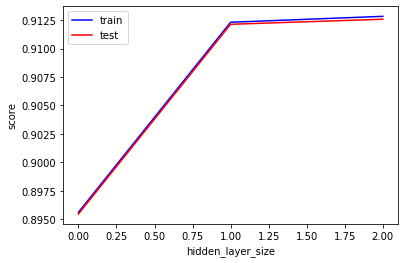

In [ ]:
import time
from sklearn.neural_network import MLPClassifier

# hyperparameters - testing
hyperparameter_name = 'hidden_layer_size'
hyperparameter_list = ['lbfgs', 'sgd', 'adam'] # solver
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify

from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running {parameter}')
    timer.param_start()
    # modify this part ----
    model = MLPClassifier(activation=activation, hidden_layer_sizes=hiden_layer_sizes, solver=parameter)
    # modify this part ----
    model_acc.score_data(model, data)
    timer.param_end()
timer.session_end()
time_per_session = timer.get_time()
print(model_acc.train_acc)
print(model_acc.test_acc)
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)


seems like solver sgd and adam are both good. adam being a little better but more overfit.

In [ ]:

import time
from sklearn.neural_network import MLPClassifier

# hyperparameters - testing
alpha = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
hyperparameter_name = 'alpha'
hyperparameter_list = alpha
solver = 'adam' # sgd is as good.
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify
random_state = 318

# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])
# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {parameter}')
    timer.param_start()
    # update here
    model = MLPClassifier(random_state=random_state, activation=activation, hidden_layer_sizes=hiden_layer_sizes, solver=solver, alpha=parameter)
    model_acc.score_data(model, data)
    timer.param_end()  
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)


lower the alpha the better.

## learning rate

timer starts
running constant
	Train Score: 0.9140875
	Test Score: 0.9135375
	elapsed time 10.101 min
running invscaling
	Train Score: 0.9140875
	Test Score: 0.9135375
	elapsed time 9.704 min
running adaptive
	Train Score: 0.9140875
	Test Score: 0.9135375
	elapsed time 9.672 min
total time: 29.476 min


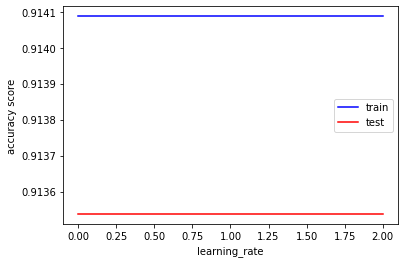

In [ ]:
from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
learning_rate = ['constant', 'invscaling', 'adaptive'] 
hyperparameter_name = 'learning_rate'
hyperparameter_list = learning_rate.copy()
# hyperparameter - to be tuned
max_iter = 200 # defines the number of epochs for sgd and adam
tol=1e-4
warm_start = False
learning_rate_init = 0.0001
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if solver=adam
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8
shuffle = True
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# hyperparamter - only used if solver=sbg
momentum = 0.9
power_t = 0.5
nesterovs_momentum = True
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000
# hyperparamter - tested
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify
solver = 'adam' # sgd is as good.
alpha = 0.0001 # lower can be better. tune later
random_state = 318
# learning_rate = ['constant', 'invscaling', 'adaptive'] # no difference

# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                            hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                            alpha=alpha, 
                            learning_rate=paramter,
                            batch_size=batch_size, 
                            learning_rate_init=learning_rate_init, 
                            power_t=power_t,
                            max_iter=max_iter, shuffle=shuffle, tol=tol,
                            warm_start=warm_start, momentum=momentum,
                            nesterovs_momentum=nesterovs_momentum,
                            early_stopping=early_stopping, 
                            validation_fraction=validation_fraction, 
                            beta_1=beta_1, beta_2=beta_2, epsilon=epsilon,
                            n_iter_no_change=n_iter_no_change, max_fun=max_fun
                            )
    model_acc.score_data(model, data)
    timer.param_end()  
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)


no difference in learning rate setting

## tune learning_rate_init

timer starts
running learning_rate_init: 1
	Train Score: 0.499925625
	Test Score: 0.5002975
	elapsed time 3.429 min
running learning_rate_init: 0.1
	Train Score: 0.888060625
	Test Score: 0.8882625
	elapsed time 202.454 min
running learning_rate_init: 0.01
	Train Score: 0.912733125
	Test Score: 0.9126025
	elapsed time 15.762 min
running learning_rate_init: 0.001
	Train Score: 0.9140875
	Test Score: 0.9135375
	elapsed time 12.433 min
running learning_rate_init: 0.0001
	Train Score: 0.912564375
	Test Score: 0.9123125
	elapsed time 15.008 min
running learning_rate_init: 1e-05
	Train Score: 0.90808125
	Test Score: 0.9075575
	elapsed time 78.438 min
total time: 327.525 min


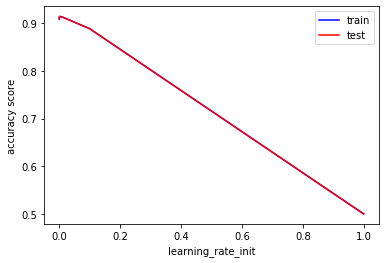

In [ ]:
from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
learning_rate_init = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
hyperparameter_name = 'learning_rate_init'
hyperparameter_list = learning_rate_init.copy()
# hyperparameter - to be tuned
max_iter = 200 # defines the number of epochs for sgd and adam
tol=1e-4
warm_start = False
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if solver=adam
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8
shuffle = True
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# hyperparamter - only used if solver=sbg
momentum = 0.9
power_t = 0.5
nesterovs_momentum = True
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000
# hyperparamter - tested
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify
solver = 'adam' # sgd is as good.
alpha = 0.0001 # lower can be better. tune later
random_state = 318
# learning_rate = ['constant', 'invscaling', 'adaptive'] # no difference

# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                            hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                            alpha=alpha, 
                            # learning_rate=learning_rate,
                            batch_size=batch_size, 
                            learning_rate_init=parameter, 
                            power_t=power_t,
                            max_iter=max_iter, shuffle=shuffle, tol=tol,
                            warm_start=warm_start, momentum=momentum,
                            nesterovs_momentum=nesterovs_momentum,
                            early_stopping=early_stopping, 
                            validation_fraction=validation_fraction, 
                            beta_1=beta_1, beta_2=beta_2, epsilon=epsilon,
                            n_iter_no_change=n_iter_no_change, max_fun=max_fun
                            )
    model_acc.score_data(model, data)
    timer.param_end()  
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)


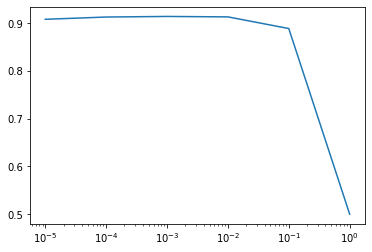

In [ ]:
plt.figure()
plt.plot(hyperparameter_list, model_acc.test_acc)
plt.xscale('log')
plt.show()


learning rate 0.001 is the best. 1e-5 takes way too long and has reduced learning.  

## beta_1 for adam solver

timer starts
running beta_1: 0.0
	Train Score: 0.913799375
	Test Score: 0.9134825
	elapsed time 12.021 min
running beta_1: 0.2
	Train Score: 0.91377625
	Test Score: 0.9136
	elapsed time 21.506 min
running beta_1: 0.4
	Train Score: 0.91251125
	Test Score: 0.9124275
	elapsed time 8.874 min
running beta_1: 0.6000000000000001
	Train Score: 0.9136375
	Test Score: 0.91339
	elapsed time 14.228 min
running beta_1: 0.8
	Train Score: 0.91254625
	Test Score: 0.912495
	elapsed time 32.916 min
total time: 89.546 min


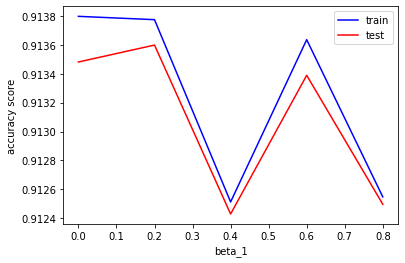

In [ ]:
from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
beta_1 = np.arange(0, 1, 0.2)
hyperparameter_name = 'beta_1'
hyperparameter_list = beta_1.copy()
# hyperparamter - only used if solver=adam
beta_2 = 0.999
epsilon = 1e-8
shuffle = True
# hyperparameter - to be tuned
max_iter = 200 # defines the number of epochs for sgd and adam
tol=1e-4
warm_start = False
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# hyperparamter - tested
learning_rate_init = 0.001 # bewteen 0.01 to 0.0001 can be tuned
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify
solver = 'adam' # sgd is as good.
alpha = 0.0001 # lower can be better. tune later
random_state = 318
# learning_rate = ['constant', 'invscaling', 'adaptive'] # no difference
# hyperparamter - only used if solver=sbg
momentum = 0.9
power_t = 0.5
nesterovs_momentum = True
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000

# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                            hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                            alpha=alpha, learning_rate_init=learning_rate_init, 
                            # learning_rate=learning_rate,
                            beta_1=parameter, 
                            beta_2=beta_2, epsilon=epsilon,
                            batch_size=batch_size, 
                            power_t=power_t,
                            max_iter=max_iter, shuffle=shuffle, tol=tol,
                            warm_start=warm_start, momentum=momentum,
                            nesterovs_momentum=nesterovs_momentum,
                            early_stopping=early_stopping, 
                            validation_fraction=validation_fraction, 
                            n_iter_no_change=n_iter_no_change, max_fun=max_fun
                            )
    model_acc.score_data(model, data)
    timer.param_end()
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)



beta 0.2 seems to be best

## test beta_2 
previously have tested this is the best. but somehow set to relu

timer starts
running beta_2: 0.99999
	Train Score: 		0.9140125
	Test Score: 		0.913505
	Overfit (train - test): 		 0.0005074999999999941
	elapsed time 14.704 min
running beta_2: 0.95
	Train Score: 		0.91343875
	Test Score: 		0.9128625
	Overfit (train - test): 		 0.0005762499999999449
	elapsed time 24.236 min
running beta_2: 0.9
	Train Score: 		0.9134625
	Test Score: 		0.9131375
	Overfit (train - test): 		 0.0003249999999999087
	elapsed time 10.763 min
running beta_2: 0.87
	Train Score: 		0.913835
	Test Score: 		0.91355
	Overfit (train - test): 		 0.0002849999999999797
	elapsed time 13.846 min
total time: 63.548 min


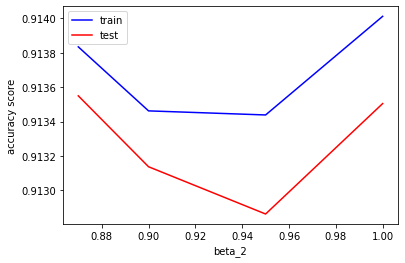

beta_2 = [0.99999, 0.95, 0.9, 0.87]
train_acc = [0.9140125, 0.91343875, 0.9134625, 0.913835]
test_acc = [0.913505, 0.9128625, 0.9131375, 0.91355]
time per param = [882.2154078483582, 1454.137715101242, 645.7646028995514, 830.7636580467224]


In [ ]:
from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
beta_2 = [0.99999, 0.95, 0.90, 0.87]
hyperparameter_name = 'beta_2'
hyperparameter_list = beta_2.copy()
# hyperparamter - only used if solver=adam
epsilon = 1e-8
shuffle = True
# hyperparameter - to be tuned
max_iter = 200 # defines the number of epochs for sgd and adam
tol=1e-4
warm_start = False
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# learning_rate = ['constant', 'invscaling', 'adaptive'] # no difference
# hyperparamter - only used if solver=sbg
momentum = 0.9
power_t = 0.5
nesterovs_momentum = True
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000

# hyperparamter - tested
beta_1 = 0.2
learning_rate_init = 0.001 # bewteen 0.01 to 0.0001 can be tuned
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify
solver = 'adam' # sgd is as good.
alpha = 0.0001 # lower can be better. tune later
random_state = 318


# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                            hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                            alpha=alpha, learning_rate_init=learning_rate_init, 
                            # learning_rate=learning_rate,
                            beta_1=beta_1, 
                            beta_2=parameter, 
                            epsilon=epsilon,
                            batch_size=batch_size, 
                            power_t=power_t,
                            max_iter=max_iter, shuffle=shuffle, tol=tol,
                            warm_start=warm_start, momentum=momentum,
                            nesterovs_momentum=nesterovs_momentum,
                            early_stopping=early_stopping, 
                            validation_fraction=validation_fraction, 
                            n_iter_no_change=n_iter_no_change, max_fun=max_fun
                            )
    model_acc.score_data(model, data)
    timer.param_end()
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')


beta_2 adjustments don't have huge impact on accuracy, but it does have lower overfit (closer test/train scores) at 0.87. Use that from now and tune later.

## espilon

timer starts
running epsilon: 1e-10
	Train Score: 		0.913633125
	Test Score: 		0.9134225
	Overfit (train - test): 		 0.00021062500000001982
	elapsed time 9.089 min
running epsilon: 1e-09
	Train Score: 		0.91280875
	Test Score: 		0.91244
	Overfit (train - test): 		 0.00036874999999991775
	elapsed time 11.460 min
running epsilon: 1e-08
	Train Score: 		0.913835
	Test Score: 		0.91355
	Overfit (train - test): 		 0.0002849999999999797
	elapsed time 13.429 min
running epsilon: 1e-07
	Train Score: 		0.9135725
	Test Score: 		0.9132475
	Overfit (train - test): 		 0.0003250000000000197
	elapsed time 13.726 min
running epsilon: 1e-06
	Train Score: 		0.913104375
	Test Score: 		0.912865
	Overfit (train - test): 		 0.00023937499999993062
	elapsed time 12.550 min
total time: 60.254 min


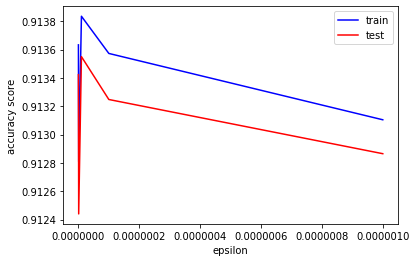

epsilon = [1e-10, 1e-09, 1e-08, 1e-07, 1e-06]
train_acc = [0.913633125, 0.91280875, 0.913835, 0.9135725, 0.913104375]
test_acc = [0.9134225, 0.91244, 0.91355, 0.9132475, 0.912865]
time per param = [545.3285357952118, 687.6081640720367, 805.7449789047241, 823.5721261501312, 752.9986641407013]


In [ ]:
from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
epsilon = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
hyperparameter_name = 'epsilon'
hyperparameter_list = epsilon.copy()
# hyperparamter - only used if solver=adam
shuffle = True
# hyperparameter - to be tuned
max_iter = 200 # defines the number of epochs for sgd and adam
tol=1e-4
warm_start = False
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# learning_rate = ['constant', 'invscaling', 'adaptive'] # no difference
# hyperparamter - only used if solver=sbg
momentum = 0.9
power_t = 0.5
nesterovs_momentum = True
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000

# hyperparamter - tested
activation = 'relu' # logistic, tanh are equally good. do not use identify
solver = 'adam' # sgd is as good.
beta_2 = 0.87 # lowest tested 0.87. has less overfit
beta_1 = 0.2
learning_rate_init = 0.001 # bewteen 0.01 to 0.0001 can be tuned
hiden_layer_sizes = 50 # stick with under 50
alpha = 0.0001 # lower can be better. tune later
random_state = 318

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                            hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                            alpha=alpha, learning_rate_init=learning_rate_init, 
                            # learning_rate=learning_rate,
                            beta_1=beta_1, beta_2=beta_2,
                            epsilon=parameter,
                            batch_size=batch_size, 
                            power_t=power_t,
                            max_iter=max_iter, shuffle=shuffle, tol=tol,
                            warm_start=warm_start, momentum=momentum,
                            nesterovs_momentum=nesterovs_momentum,
                            early_stopping=early_stopping, 
                            validation_fraction=validation_fraction, 
                            n_iter_no_change=n_iter_no_change, max_fun=max_fun
                            )
    model_acc.score_data(model, data)
    timer.param_end()
    print(model)
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')


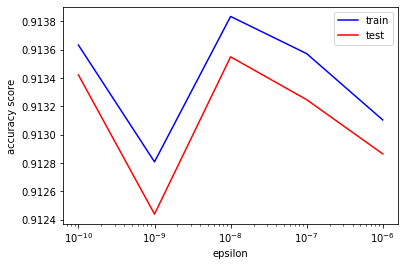

In [ ]:
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name, 'log')

1e-8 epsilon seems to be the best

## epochs (Max_iter)

timer starts
running max_iter: 100
	Train Score: 		0.913835
	Test Score: 		0.91355
	Overfit (train - test): 	0.0002849999999999797
	elapsed time 12.750 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=318, shuffle=True, solver='adam',
              tol=1e-08, validation_fraction=0.1, verbose=False,
              warm_start=False)
running max_iter: 200
	Train Score: 		0.913835
	Test Score: 		0.91355
	Overfit (train - test): 	0.0002849999999999797
	elapsed time 12.552 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, lea

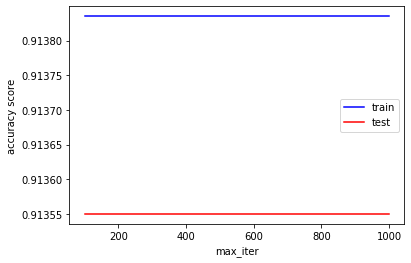

max_iter = [100, 200, 500, 1000]
train_acc = [0.913835, 0.913835, 0.913835, 0.913835]
test_acc = [0.91355, 0.91355, 0.91355, 0.91355]
time per param = [765.0199072360992, 753.1497228145599, 919.645397901535, 770.7448620796204]


In [ ]:

from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
max_iter = [100, 200, 500, 1000] # defines the number of epochs for sgd and adam
hyperparameter_name = 'max_iter'
hyperparameter_list = max_iter.copy()
# hyperparamter - only used if solver=adam
shuffle = True
# hyperparameter - to be tuned
tol= 1e-8
warm_start = False
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# learning_rate = ['constant', 'invscaling', 'adaptive'] # no difference
# hyperparamter - only used if solver=sbg
momentum = 0.9
power_t = 0.5
nesterovs_momentum = True
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000

# hyperparamter - tested
epsilon = 1e-8 #can test bewteen 10e-9 to 10e-7
activation = 'relu' # logistic, tanh are equally good. do not use identify
solver = 'adam' # sgd is as good.
beta_2 = 0.87 # lowest tested 0.87. has less overfit
beta_1 = 0.2
learning_rate_init = 0.001 # bewteen 0.01 to 0.0001 can be tuned
hiden_layer_sizes = 50 # stick with under 50
alpha = 0.0001 # lower can be better. tune later
random_state = 318

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                    hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                    alpha=alpha, learning_rate_init=learning_rate_init, 
                    # learning_rate=learning_rate,
                    beta_1=beta_1, beta_2=beta_2, epsilon=epsilon,
                    max_iter=parameter, 
                    batch_size=batch_size, power_t=power_t,
                    shuffle=shuffle, tol=tol,
                    warm_start=warm_start, momentum=momentum,
                    nesterovs_momentum=nesterovs_momentum,
                    early_stopping=early_stopping, 
                    validation_fraction=validation_fraction, 
                    n_iter_no_change=n_iter_no_change, max_fun=max_fun
                    )
    model_acc.score_data(model, data)
    timer.param_end()
    print(model)
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')


There are no gain from max_iter over 100

## tune sgd

### momentum

timer starts
running momentum: 0.1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Train Score: 0.887968125
	Test Score: 0.887835
	elapsed time 2.342 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.1, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=318, shuffle=True, solver='sgd',
              tol=1e-08, validation_fraction=0.1, verbose=False,
              warm_start=False)
running momentum: 0.30000000000000004


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Train Score: 0.890121875
	Test Score: 0.889945
	elapsed time 2.322 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.30000000000000004, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=318,
              shuffle=True, solver='sgd', tol=1e-08, validation_fraction=0.1,
              verbose=False, warm_start=False)
running momentum: 0.5000000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Train Score: 0.89295
	Test Score: 0.89264
	elapsed time 2.322 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.5000000000000001, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=318,
              shuffle=True, solver='sgd', tol=1e-08, validation_fraction=0.1,
              verbose=False, warm_start=False)
running momentum: 0.7000000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Train Score: 0.89759625
	Test Score: 0.8969
	elapsed time 2.366 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.7000000000000001, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=318,
              shuffle=True, solver='sgd', tol=1e-08, validation_fraction=0.1,
              verbose=False, warm_start=False)
total time: 9.353 min


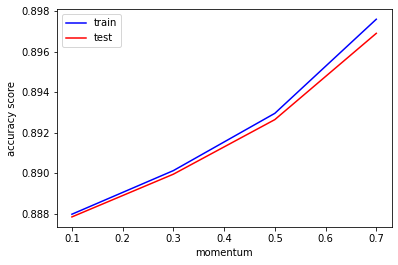

momentum = [0.1 0.3 0.5 0.7]
train_acc = [0.887968125, 0.890121875, 0.89295, 0.89759625]
test_acc = [0.887835, 0.889945, 0.89264, 0.8969]
time per param = [140.54731702804565, 139.33889651298523, 139.3111424446106, 141.98654961585999]


In [5]:

from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
momentum = np.arange(0.1, 0.9, 0.2) # for sbg only
hyperparameter_name = 'momentum'
hyperparameter_list = momentum.copy()
# hyperparamter - only used if solver=sbg
power_t = 0.5
nesterovs_momentum = True
# hyperparamter - only used if solver=adam
shuffle = True
# hyperparameter - to be tuned
tol= 1e-8
warm_start = False
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000

# hyperparamter - tested
solver = 'sgd' # adam is as good.
activation = 'relu' # logistic, tanh are equally good. do not use identify
max_iter = 20 # more the better, defines the number of epochs for sgd and adam
# learning_rate = ['constant', 'invscaling', 'adaptive'] # no difference

# hyperparamter - tested (for solver='adam')
epsilon = 1e-8 #can test bewteen 10e-9 to 10e-7
beta_2 = 0.87 # lowest tested 0.87. has less overfit
beta_1 = 0.2
learning_rate_init = 0.001 # bewteen 0.01 to 0.0001 can be tuned
hiden_layer_sizes = 50 # stick with under 50
alpha = 0.0001 # lower can be better. tune later
random_state = 318

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                    hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                    alpha=alpha, learning_rate_init=learning_rate_init, 
                    # learning_rate=learning_rate,
                    beta_1=beta_1, beta_2=beta_2, epsilon=epsilon,
                    momentum=parameter,
                    max_iter=max_iter, 
                    batch_size=batch_size, power_t=power_t,
                    shuffle=shuffle, tol=tol,
                    warm_start=warm_start, 
                    nesterovs_momentum=nesterovs_momentum,
                    early_stopping=early_stopping, 
                    validation_fraction=validation_fraction, 
                    n_iter_no_change=n_iter_no_change, max_fun=max_fun
                    )
    model_acc.score_data(model, data)
    timer.param_end()
    print(model)
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')

### power

timer starts
running power_t: 0.1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Train Score: 0.907430625
	Test Score: 0.90725
	elapsed time 2.299 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.1, random_state=318, shuffle=True, solver='sgd',
              tol=1e-08, validation_fraction=0.1, verbose=False,
              warm_start=False)
running power_t: 0.30000000000000004


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Train Score: 0.907430625
	Test Score: 0.90725
	elapsed time 2.355 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.30000000000000004, random_state=318, shuffle=True,
              solver='sgd', tol=1e-08, validation_fraction=0.1, verbose=False,
              warm_start=False)
running power_t: 0.5000000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Train Score: 0.907430625
	Test Score: 0.90725
	elapsed time 2.302 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5000000000000001, random_state=318, shuffle=True,
              solver='sgd', tol=1e-08, validation_fraction=0.1, verbose=False,
              warm_start=False)
running power_t: 0.7000000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Train Score: 0.907430625
	Test Score: 0.90725
	elapsed time 2.314 min
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.2,
              beta_2=0.87, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.7000000000000001, random_state=318, shuffle=True,
              solver='sgd', tol=1e-08, validation_fraction=0.1, verbose=False,
              warm_start=False)
total time: 9.269 min


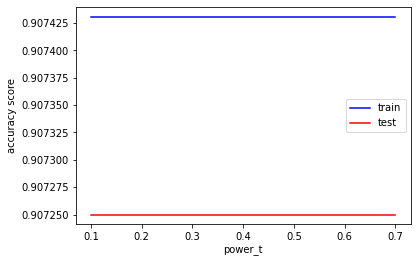

power_t = [0.1 0.3 0.5 0.7]
train_acc = [0.907430625, 0.907430625, 0.907430625, 0.907430625]
test_acc = [0.90725, 0.90725, 0.90725, 0.90725]
time per param = [137.9338665008545, 141.27475357055664, 138.0913689136505, 138.82680535316467]


In [8]:
# tune power
from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
power_t = np.arange(0.1, 0.9, 0.2)
hyperparameter_name = 'power_t'
hyperparameter_list = power_t.copy()
# hyperparamter - tested
solver = 'sgd' # adam is as good.
activation = 'relu' # logistic, tanh are equally good. do not use identify
max_iter = 20 # more the better, defines the number of epochs for sgd and adam
learning_rate = 'constant' #'invscaling', 'adaptive' no difference

# hyperparamter - tested (for solver='adam')
epsilon = 1e-8 #can test bewteen 10e-9 to 10e-7
beta_2 = 0.87 # lowest tested 0.87. has less overfit
beta_1 = 0.2
learning_rate_init = 0.001 # bewteen 0.01 to 0.0001 can be tuned
hiden_layer_sizes = 50 # stick with under 50
alpha = 0.0001 # lower can be better. tune later
random_state = 318
# hyperparamter - only used if solver=sbg
momentum = 0.9
nesterovs_momentum = True
# hyperparamter - only used if solver=adam
shuffle = True
# hyperparameter - to be tuned
tol= 1e-8
warm_start = False
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                    hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                    alpha=alpha, learning_rate_init=learning_rate_init, 
                    learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, 
                    epsilon=epsilon, momentum=momentum,
                    max_iter=max_iter, batch_size=batch_size,
                    power_t=parameter,
                    shuffle=shuffle, tol=tol,
                    warm_start=warm_start, 
                    nesterovs_momentum=nesterovs_momentum,
                    early_stopping=early_stopping, 
                    validation_fraction=validation_fraction, 
                    n_iter_no_change=n_iter_no_change, max_fun=max_fun
                    )
    model_acc.score_data(model, data)
    timer.param_end()
    print(model)
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')


Seems there isn't any difference in changing power_t. This is because learning_rate needs to be set to invascaling.

In [ ]:
# tune power
from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
power_t = np.arange(0.1, 0.9, 0.2)
hyperparameter_name = 'power_t'
hyperparameter_list = power_t.copy()
# hyperparamter - tested
solver = 'sgd' # adam is as good.
activation = 'relu' # logistic, tanh are equally good. do not use identify
max_iter = 20 # more the better, defines the number of epochs for sgd and adam
learning_rate = 'invscaling' # 'constant', 'invscaling', 'adaptive' no difference for adam

# hyperparamter - tested (for solver='adam')
epsilon = 1e-8 #can test bewteen 10e-9 to 10e-7
beta_2 = 0.87 # lowest tested 0.87. has less overfit
beta_1 = 0.2
learning_rate_init = 0.001 # bewteen 0.01 to 0.0001 can be tuned
hiden_layer_sizes = 50 # stick with under 50
alpha = 0.0001 # lower can be better. tune later
random_state = 318
# hyperparamter - only used if solver=sbg
momentum = 0.9
nesterovs_momentum = True
# hyperparamter - only used if solver=adam
shuffle = True
# hyperparameter - to be tuned
tol= 1e-8
warm_start = False
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000

# test hyperparameter
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                    hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                    alpha=alpha, learning_rate_init=learning_rate_init, 
                    learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, 
                    epsilon=epsilon, momentum=momentum,
                    max_iter=max_iter, batch_size=batch_size,
                    power_t=parameter,
                    shuffle=shuffle, tol=tol,
                    warm_start=warm_start, 
                    nesterovs_momentum=nesterovs_momentum,
                    early_stopping=early_stopping, 
                    validation_fraction=validation_fraction, 
                    n_iter_no_change=n_iter_no_change, max_fun=max_fun
                    )
    model_acc.score_data(model, data)
    timer.param_end()
    print(model)
# end time
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')


timer starts
running power_t: 0.1


## Next: test change to activation teha 